In [1]:
# Imports das bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import da tabela e verificação inicial dos dados
enem_df = pd.read_parquet('../DataFrames/enem-2023.parquet')
enem_df.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A
5,210058061539,2023,6,F,1,3,1,1,0,1,...,B,A,A,B,A,A,C,A,A,B
6,210059855122,2023,11,F,1,3,1,1,12,1,...,B,A,A,B,A,B,B,A,A,B
7,210058387333,2023,11,M,1,3,1,1,12,1,...,B,A,A,A,A,A,B,A,B,B
8,210059085137,2023,5,F,1,2,1,1,1,1,...,B,A,A,B,A,A,C,A,A,B
9,210060801601,2023,11,M,1,1,1,1,8,1,...,B,A,B,C,B,A,C,A,B,B


In [3]:
#Info das tabela, número de clinhas, colunas, tipos de dados e uso de memória.
enem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933955 entries, 0 to 3933954
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int32  
 2   TP_FAIXA_ETARIA         int32  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int32  
 5   TP_COR_RACA             int32  
 6   TP_NACIONALIDADE        int32  
 7   TP_ST_CONCLUSAO         int32  
 8   TP_ANO_CONCLUIU         int32  
 9   TP_ESCOLA               int32  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int32  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int32  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int32  

In [4]:
#Tabela que mostra quantos carros o cadidato possui em sua residência, sendo "A" nenhum e "F" quatro. *Dados normalizados*
enem_df['Q010'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Q010
A    55.09%
B     35.4%
C     8.22%
D     1.05%
E     0.24%
Name: proportion, dtype: object

In [5]:
# Tabela que compara os empregos dos pais de cada candidato (Q003 do pai e Q004 da mãe), sendo "A" empregos menos socialmente 
# valorizados e indo até "E" com empregos mais socialmente valorizados e "F" "Não sei". *Dados normalizados*
pd.crosstab(enem_df['Q003'], enem_df['Q004'], normalize=True)

Q004,A,B,C,D,E,F
Q003,,,,,,
A,0.120663,0.043926,0.004084,0.014945,0.001090,0.006137
B,0.010684,0.139967,0.011076,0.026101,0.002383,0.010650
C,0.010859,0.123636,0.030942,0.044621,0.003760,0.017948
D,0.003764,0.045788,0.007873,0.098088,0.011826,0.012321
E,0.000576,0.008263,0.001601,0.024047,0.028869,0.004818
F,0.008039,0.053441,0.007251,0.019048,0.003060,0.037856


Boxplot da Nota de Matemática (NU_NOTA_MT)


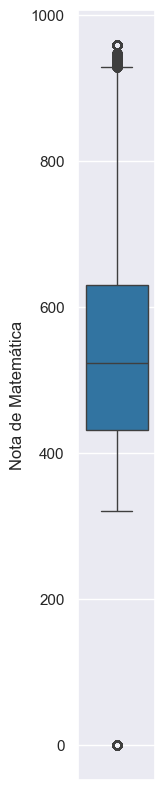

In [6]:
#Gráfico boxplot utilizando matpltlib e seaborn que mostra os resultados das notas da prova de matemática.

# Configurar o estilo do seaborn
sns.set(style="darkgrid")

# Criar o boxplot
plt.figure(figsize=(1, 10))
sns.boxplot(y=enem_df["NU_NOTA_MT"], color="#1f77b4")

# Configurar título e rótulos
print("Boxplot da Nota de Matemática (NU_NOTA_MT)")
plt.ylabel("Nota de Matemática")

# Exibir o gráfico
plt.show()

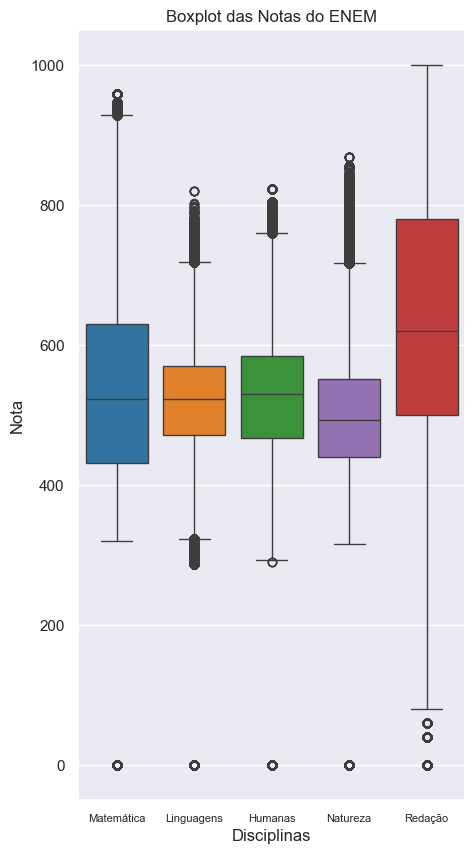

In [7]:
#Gráfico que compara todos os resultados de todas as provas 

# Definir as cores para cada uma das disciplinas
cores = ["#1f77b4", "#ff7f0e", "#2ca02c", "#9467bd", "#d62728"]

# Criar o boxplot
plt.figure(figsize=(5, 10))
ax = sns.boxplot(data=enem_df[["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_REDACAO"]], palette=cores)

# Alterar os nomes das disciplinas
disciplinas = ["Matemática", "Linguagens", "Humanas", "Natureza", "Redação"]
plt.xticks(ticks=range(len(disciplinas)), labels=disciplinas, fontsize=8)  # Rotaciona os e altera o nome dos rótulos do eixo x.

# Configurar título e rótulos
plt.title("Boxplot das Notas do ENEM")
plt.ylabel("Nota")
plt.xlabel("Disciplinas")

# Exibir o gráfico
plt.show()

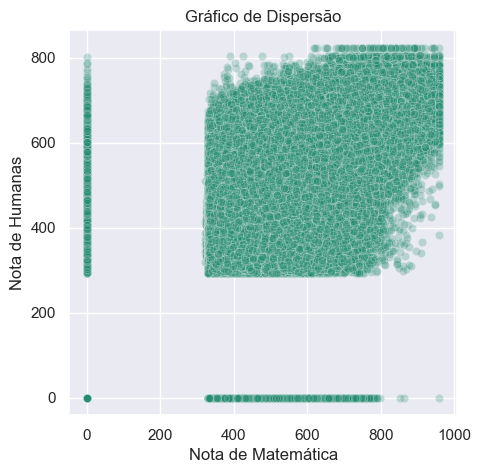

In [8]:
# Gráfico de dispersão que compara as notas da prova de Matemática com as notas da prova de Humanas de cada inscrito.

# Criar o gráfico de dispersão
plt.figure(figsize=(5, 5))
sns.scatterplot(x=enem_df["NU_NOTA_MT"], y=enem_df["NU_NOTA_CH"], alpha=0.25, color="#258b70")

# Configurar título e rótulos
plt.title("Gráfico de Dispersão")
plt.xlabel("Nota de Matemática")
plt.ylabel("Nota de Humanas")

# Exibir o gráfico
plt.show()

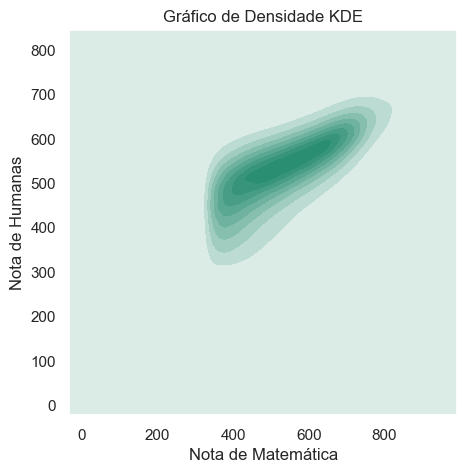

In [9]:
# Gráfico de densidade (KDE) que compara as notas da prova de Matemática com as notas da prova de Humanas de cada inscrito.

# Criar o gráfico de densidade (KDE) como curvas de nível
plt.figure(figsize=(5, 5))
sns.kdeplot(x=enem_df["NU_NOTA_MT"], y=enem_df["NU_NOTA_CH"], fill=True, cmap=sns.light_palette("#258b70", as_cmap=True), levels=10, thresh=0)

# Configurar título e rótulos
plt.title("Gráfico de Densidade KDE")
plt.xlabel("Nota de Matemática")
plt.ylabel("Nota de Humanas")

# Exibir o gráfico
plt.show()